# 비선형 회귀(Nonlinear Regression) - 2차 함수
* 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀
* 다항식을 이용한 회귀를 다항 회귀(Polynomial Regression) : 회귀선이 직선이 아닌 2차 함수 3차 함수 등의 곡선으로 표현

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

#### 데이터 설정 

In [7]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
print(len(X))

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
print(a, b, c)

16
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.20500001> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.741824> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.641805>


#### 가설
* 2차 함수에 대한 다항식을 가설로 사용한다. --> 1차 함수인 경우엔 1차 함수를 가설로 사용한다. 

In [10]:
def hypothesis(X):
    return a * X*X + b * X + c
hypothesis(X)

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.8828022 , 0.1879043 , 1.9019613 , 0.66424423, 1.7178102 ,
       0.83165073, 0.47557524, 0.33843222, 0.19214508, 0.39539462,
       0.15936714, 0.37211767, 0.45645702, 0.6567235 , 0.19642681,
       4.065555  ], dtype=float32)>

#### 비용함수
* 전차의 제곱의 평균을 비용으로 계산한다.
* Y : 실제 값
* y_pred : hypothesis(X)에 의해 계산된 기대 값

In [11]:
def loss_fn():
    y_pred = hypothesis(X)
    loss = tf.reduce_mean(tf.square(Y - y_pred))
    return loss
loss_fn()

<tf.Tensor: shape=(), dtype=float32, numpy=231.01851>

#### 최적화 수행
* 손실을 최소화 하는 것이 목표
* optimizer는 복잡한 미분과 가중치 업데이트를 자동으로 해주는 편리한 도구
* lr(learning rate-학습률) : 적당한 학습률을 넣으면 안정적이고 효율적으로 학습 수행(보통 0.1 ~ 0.0001 사이의 수 사용)

In [12]:
optimizer = tf.optimizers.Adam(lr=0.07)

#### 학습
* optimizer.minimize(loss_fn, var_list = vars)
* loss_fn : 최소화할 손실
* var_list = vars : 학습시킬 변수의 리스트

In [14]:
for i in range(1001):
    optimizer.minimize(loss_fn, var_list = [a, b, c])  
    loss = loss_fn()
    if i % 100 == 0:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', loss.numpy())

0 a: 0.2750021 b: 0.6718221 c: 0.7118071 loss: 227.53244
100 a: 3.9035072 b: -5.659872 c: 6.616903 loss: 66.72155
200 a: 2.7709572 b: -4.521093 c: 10.373099 loss: 30.98228
300 a: 1.271767 b: -2.2813091 c: 12.961689 loss: 15.929166
400 a: 0.3211404 b: -0.8534574 c: 14.58379 loss: 10.965168
500 a: -0.18814991 b: -0.08886545 c: 15.454711 loss: 9.728843
600 a: -0.42384803 b: 0.2649542 c: 15.85794 loss: 9.49425
700 a: -0.5184178 b: 0.40691775 c: 16.019733 loss: 9.460222
800 a: -0.5513636 b: 0.4563731 c: 16.076103 loss: 9.4564495
900 a: -0.5613173 b: 0.47131562 c: 16.093132 loss: 9.456131
1000 a: -0.5639183 b: 0.47522002 c: 16.097582 loss: 9.456114


#### 그래프 그리기

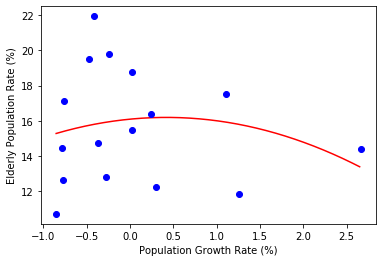

In [15]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = hypothesis(line_x)

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()